In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
sales = pd.read_csv("./retail_sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [61]:
data = sales.copy()

In [62]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [22]:
# data['Gender'] = data['Gender'].astype('category')
# data['Product Category'] = data['Product Category'].astype('category')

In [63]:
#One hot encoding
data = pd.get_dummies(data,columns = ['Gender','Product Category'],drop_first=True)
data.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,True,False,False
1,2,2023-02-27,CUST002,26,2,500,1000,False,True,False
2,3,2023-01-13,CUST003,50,1,30,30,True,False,True
3,4,2023-05-21,CUST004,37,1,500,500,True,True,False
4,5,2023-05-06,CUST005,30,2,50,100,True,False,False


In [64]:
data['Gender_Male'] = data['Gender_Male'].astype(int)
data['Product Category_Clothing'] = data['Product Category_Clothing'].astype(int)
data['Product Category_Electronics'] = data['Product Category_Electronics'].astype(int)

In [65]:
data

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,1,0,0
1,2,2023-02-27,CUST002,26,2,500,1000,0,1,0
2,3,2023-01-13,CUST003,50,1,30,30,1,0,1
3,4,2023-05-21,CUST004,37,1,500,500,1,1,0
4,5,2023-05-06,CUST005,30,2,50,100,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,62,1,50,50,1,1,0
996,997,2023-11-17,CUST997,52,3,30,90,1,0,0
997,998,2023-10-29,CUST998,23,4,25,100,0,0,0
998,999,2023-12-05,CUST999,36,3,50,150,0,0,1


In [66]:
#Build model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
# X = data.drop(columns = ['Transaction ID','Date','Customer ID','Total Amount'])
# y = data['Total Amount']

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Sử dụng các tính năng này để huấn luyện mô hình
X = data[['Month', 'Day', 'Day_of_Week']]  # Các tính năng đầu vào
y = data['Total Amount']  # Mục tiêu là doanh thu


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [71]:
y_pred = gbr.predict(X_test)

In [72]:
print("Sai số trung bình tuyệt đối: MAE = ",mean_absolute_error(y_test,y_pred))

Sai số trung bình tuyệt đối: MAE =  438.24108015431005


In [73]:
data['Total Amount'].mean()

np.float64(456.0)

Text(0.5, 1.0, 'Mức độ quan trọng của các yếu tố')

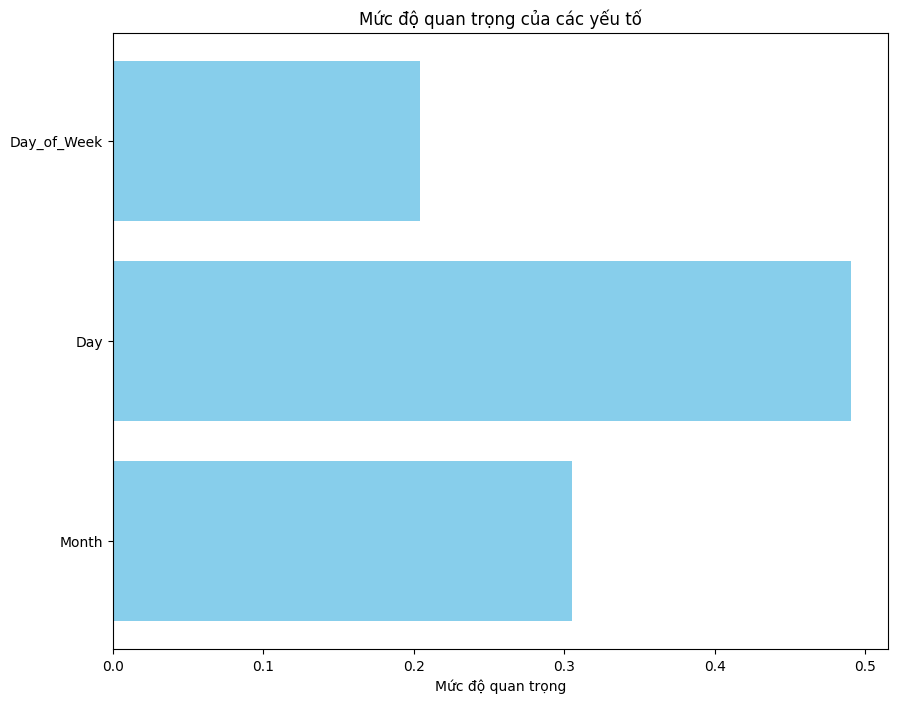

In [74]:
#Visualization
feature_important = gbr.feature_importances_
feature = X.columns

plt.figure(figsize=(10,8))
plt.barh(feature,feature_important,color = 'skyblue')
plt.xlabel("Mức độ quan trọng")
plt.title("Mức độ quan trọng của các yếu tố")


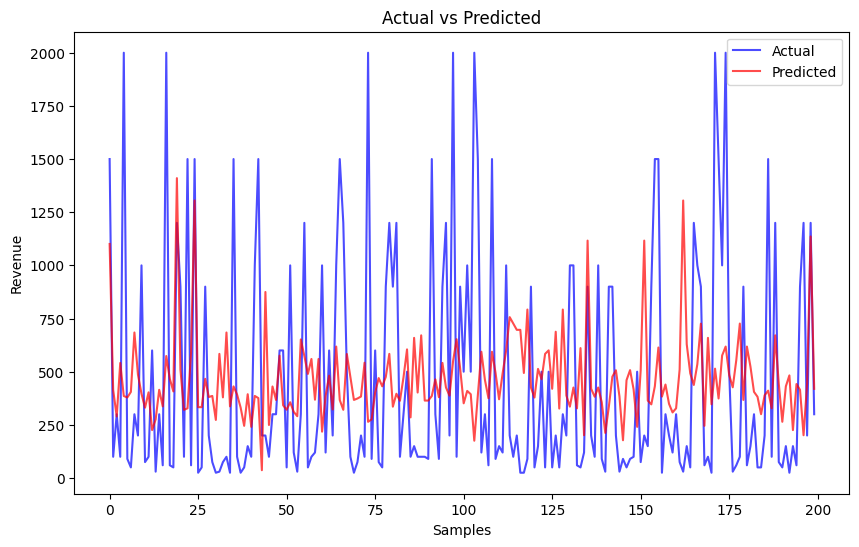

In [75]:
y_true = y_test
plt.figure(figsize=(10,6))
plt.plot(y_true.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [78]:
# Dự báo cho 3 tháng tiếp theo
future_dates = pd.date_range(start=data['Date'].max(), periods=4, freq='ME')[1:]

# Tạo các tính năng thời gian cho 3 tháng tiếp theo
future_data = pd.DataFrame({
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Day_of_Week': future_dates.dayofweek
})

# Dự báo doanh thu cho 3 tháng tiếp theo
forecast = gbr.predict(future_data)

# In kết quả dự báo
print("Dự báo doanh thu cho 3 tháng tiếp theo:")
print(forecast)


Dự báo doanh thu cho 3 tháng tiếp theo:
[516.24679129 828.41157337  34.43267171]


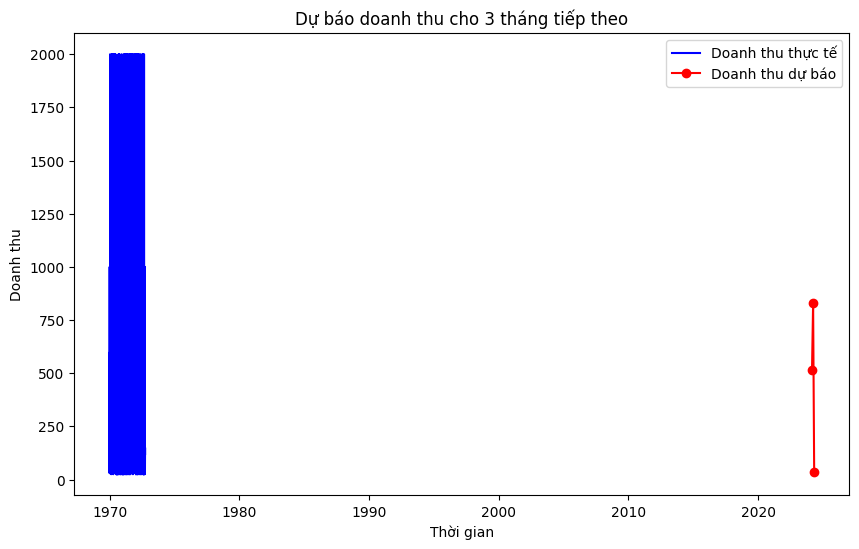

In [80]:
plt.figure(figsize=(10,6))
plt.plot(data['Total Amount'], label='Doanh thu thực tế', color='blue')
plt.plot(future_dates, forecast, label='Doanh thu dự báo', color='red', marker='o')
plt.title('Dự báo doanh thu cho 3 tháng tiếp theo')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.show()


### Sử dụng ARIMA

In [92]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
data.set_index('Date')
amount = data['Total Amount']

In [94]:
# Xây dựng mô hình ARIMA với tham số (p, d, q)
model = ARIMA(amount, order=(5,1,0))  # Ví dụ: p=5, d=1, q=0
model_fit = model.fit()

# Dự báo doanh thu cho 3 tháng tiếp theo
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# In kết quả dự báo
print("Dự báo doanh thu cho 3 tháng tiếp theo:")
print(forecast)


Dự báo doanh thu cho 3 tháng tiếp theo:
1000     90.834597
1001    100.430097
1002    108.993214
Name: predicted_mean, dtype: float64


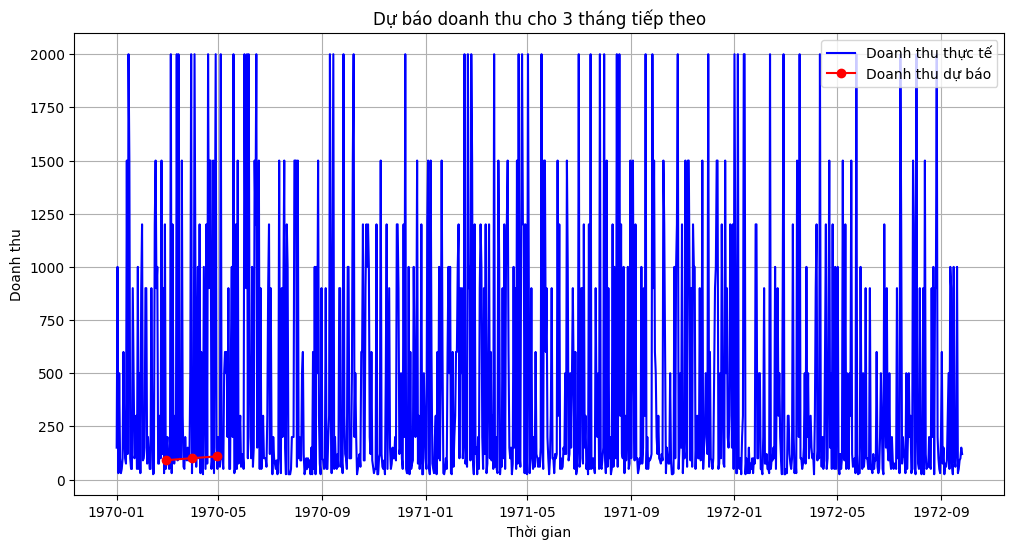

In [98]:
# Tạo mảng ngày cho 3 tháng tiếp theo
forecast_dates = pd.date_range(amount.index[-1], periods=forecast_steps+1, freq='ME')[1:]

# Vẽ đồ thị
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu doanh thu thực tế
plt.plot(amount, label='Doanh thu thực tế', color='blue')

# Vẽ dữ liệu dự báo
plt.plot(forecast_dates, forecast, label='Doanh thu dự báo', color='red', marker='o')

# Tùy chỉnh đồ thị
plt.title('Dự báo doanh thu cho 3 tháng tiếp theo')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()
